<a href="https://colab.research.google.com/github/sachinkun21/HR-Aanalytics-Predicting-Employe-Churn-Using-Decision-Tree/blob/master/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overiew: HR analytics: Predicting employee churn
Among all of the business domains, HR is still the least disrupted. However, the latest developments in data collection and analysis tools and technologies - allow for data driven decision-making in all dimensions, including HR. 
- This Tutorial will provide a solid basis for dealing with employee data and developing a predictive model to analyze employee turnover.

### What is HR Analyitcs:
- data driven approach to manage people at work

#### Problems in HR Department:
- Hiring and Assessment
- Retention
- Performance Evaluation
- Learning and developments
- Collaboration/Team Composition
- Others(Abseenteism/Attrition)

In this, we will concentrate on Employee Turnover production which is related to Hiring/Assessing and Retention
#### Employee Turnover
- It's a process related to employees leaving the company
- Also known as employee Attrition or Employee Churn
- If not dealt with properly, Results in High Loss to organization.
- Having predicted this, we can create strategy related to company's hiring and Retention policies

#### Advantages of prediction Turnover beforehand:
- We can identify good workers and change the strategy in order to Retain them
- We can also start the hiring process of new employees on time

#### Goals of this Analysis-
- We will try to predict Employee Turnover
- We will also try to understand the most important feature impacting them


#### Flow of this Analysis:
- Describing and Manipulating the Data
- Predicting Employee Turnover
- Evaluating and Tuning Predictions
- Selecting Final Model


#### Step1: Loading the Dataset and Libaries





In [6]:
import os
os.listdir()

['.config', 'turnover.csv', 'sample_data']

In [7]:
# linear algebra
import numpy as np
# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Reading "turnover.csv" file and saving it in a DataFrame
df = pd.read_csv("turnover.csv")
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Step2: Descriptive Analysis
- In this section we will explore the HR dataset and analyze the structure. 
- We will describe and visualize some of the key variables
-  transform and manipulate the dataset to make it ready for analytics


In [8]:
#Let's list the datatype and other infos for each parameter
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- There are 15 parameters in our Dataset
- Also there are 15000 datapoints
- 2 of the variables are of Object type/Categorical
- 13 of the variables are Numeric


Categorical variables are variables that receive a limited number of values that describe a category. They can be of two types:

- Ordinal – variables with two or more categories that can be ranked or ordered (e.g. “low”, “medium”, “high”)
- Nominal – variables with two or more categories that do not have an intrinsic order (e.g. “men”, “women”)

As you already know that the Numerical variables can be directly used for performing mathematical calculation  and statistical inference while the Object type require Transformation into categorical types to work on.

Let's take a look at data stored in the dataset to understand more about it.

In [9]:
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


- Last two columns are department and salary which need to be converted into numerical categorical variables.

In [10]:
# Printing the unique values of the "department" column
print("Unique values of the department")
print(df.department.unique())

# Printing the unique values of the "salary" column
print("\n")
print("Unique values of the salary")
print(df.salary.unique())

Unique values of the department
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


Unique values of the salary
['low' 'medium' 'high']


- As we can see 'low' 'medium' 'high'] represents ordered categorical variables
- while ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT' 'product_mng' 'marketing' 'RandD'] isn't

#### Transforming categorical variables

#### Ordinal Variable
We will encode categories of the salary variable, which is ordinal based on the values:
- We first have to assign salary column as categorical
- Then we will  specify the correct order of categories
- finally, we will encode each category with a numeric value corresponding to its specific position in the order

In [11]:
# Changing the type of the "salary" column to categorical
df.salary = df.salary.astype('category')

# Providing the correct order of categories
df.salary = df.salary.cat.reorder_categories(['low', 'medium','high'])

# Encoding categories with integer values
df['salary_cat'] = df.salary.cat.codes

# Printing the Numerical ordering corresponing to each category
df[['salary','salary_cat']].head()

,salary,salary_cat
0,low,0
1,medium,1
2,medium,1
3,low,0
4,low,0


The same task as above can be accomplished using a mapper function as given below:

In [0]:
# def map_salary(category):
#   if category=="low":
#     return 0
#   elif category=="medium":
#     return 1
#   elif category=="high":
#     return 2
#   else:
#     return "NA"

# df['salary_cat_map'] = df['salary'].map(map_salary)
# df['salary_cat_map'].head()


salary column is now encoded as an ordered category, and ready for our prediction algorithm.

Let's deal with department column Next:

#### Nominal Variable:
- As we already know nominal variables have No Rank or Order, for example department column here.
- Encoding approach won't be useful here
- Thus in order to transform such type of variables, we will have to generate dummy variables
- Dummy variable is a variable that can only get two values 0 or 1.
- for example: We have 10 unique values in Department columns. So we will create 10 columns for each datapoint corresponding to the 10 departments.
- Now if an employee is working in one of the departments, let's say accounting dept, we will have value 1 in accounting and rest of the nine columns as value 0.



we will use pandas get_dummies() on the department column of the data to generate dummy variables and save them inside a new DataFrame called departments

In [12]:
# Getting dummy variables and saving them inside a new DataFrame
departments = pd.get_dummies(df.department)

# Taking quick look to the first 5 rows of departments dataframe
print(departments.head())

   IT  RandD  accounting  hr  ...  product_mng  sales  support  technical
0   0      0           0   0  ...            0      1        0          0
1   0      0           0   0  ...            0      1        0          0
2   0      0           0   0  ...            0      1        0          0
3   0      0           0   0  ...            0      1        0          0
4   0      0           0   0  ...            0      1        0          0

[5 rows x 10 columns]


A dummy trap is a situation where different dummy variables convey the same information. 

In this case, if an employee is, say, from the accounting department (i.e. value in the accounting column is 1), then you're certain that s/he is not from any other department (values everywhere else are 0). Thus, you could actually learn about his/her department by looking at all the other departments.

For that reason, whenever n dummies are created (in your case, 10), only n - 1 (in this case, 9) of them are enough, and the n-th column's information is already included.

Therefore, we will drop one of the department dummies to avoid dummy trap, and 
also get rid of the old department column in original dataframe, then join df with departments dataframe.

In [13]:
# Dropping the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Dropping the old column "department" as you don't need it anymore
#data = data.drop("department", axis=1)

# Joining the new dataframe "departments" to your employee dataset: done
df = df.join(departments)

# printing top 5 rows of dataframe again
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,salary_cat,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0


#### Descriptive Statistics

Percentage of employees who churn:
The column churn is providing information about whether an employee has left the company or not is the column churn:

- if the value of this column is 0, the employee is still with the company
- if the value of this column is 1, then the employee has left the company
Let’s calculate the turnover rate:

we will first count the number of times the variable churn has the value 1 and the value 0, respectively,

then divide both counts by the total, and multiply the result by 100 to get the percentage of employees who left and stayed


In [14]:
# Get the total number of observations and save it
n_employees = len(df)

# Print the number of employees who left/stayed
print(df.churn.value_counts(),"\n")

# Print the percentage of employees who left/stayed
print(df.churn.value_counts()/n_employees*100)

0    11428
1     3571
Name: churn, dtype: int64 

0    76.191746
1    23.808254
Name: churn, dtype: float64


- As we can see, 11,428 employees stayed, which accounts for about 76% of the total employee count. 
- Similarly, 3,571 employees left, which accounts for about 24% of them

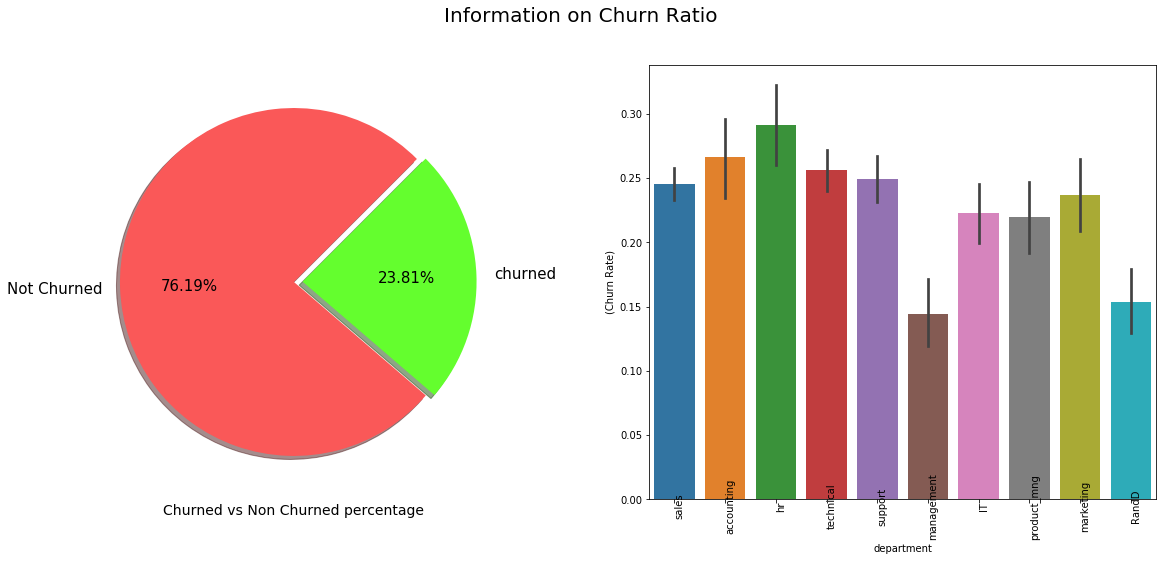

In [15]:
f, ax = plt.subplots(1,2, figsize=(20,8))

colors = ["#FA5858", "#64FE2E"]
labels = ("Not Churned", "churned")

plt.suptitle('Information on Churn Ratio', fontsize=20)

df["churn"].value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=15, startangle=45)




ax[0].set_xlabel('Churned vs Non Churned percentage', fontsize=14)
ax[0].set_ylabel('')

palette = ["#64FE2E", "#FA5858"]

sns.barplot(x = 'department', y = 'churn'  , data = df)
ax[1].set(ylabel="(Churn Rate)")
ax[1].set_xticklabels(df["department"].unique(), rotation=90, rotation_mode="anchor")
plt.show()

### Splitting the data

#### Separating Target and Features
In order to make a prediction (in this case, whether an employee would leave or not), one needs to separate the dataset into two components:
- Dropping variables with data type as string(object)
- The dependent variable or target which needs to be predicted
- The independent variables or features that will be used to make a prediction
Your task is to separate the target and features. 

The target you have here is the employee churn, and features include everything else.

In [0]:
df = df.drop(['department', 'salary'] , axis = 1)
# selecting dependent variable column (churn) and setting it as target variable y
y = df.churn

# Drop column churn and set everything else as features X
X = df.drop("churn",axis=1)

#### Train- Test split
Spliting employee data:<br>
Overfitting the dataset is a common problem in analytics. This happens when a model is working well on the dataset it was developed upon, but fails to generalize outside of it.

A train/test split is implemented to ensure model generalization: We develop the model using the training sample and try it out on the test sample later on.

In this section, we will split both target and features into train and test sets with 75%/25% ratio, respectively.
- Train: the component used to develop the model
- Test: the component used to validate the model

In [0]:
# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Creating the splits both for target and features, Setting the test sample to be 25% of your observations
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [18]:
len(X_train), len(X_test),len(y_train), len(y_test)

(11249, 3750, 11249, 3750)


Since the problem in our hand is Binary classification, we can pick any of the classification Class algorithms such as :
- Logistic regression
- SVM
- Bayesian classifier
- Tree based Models
- Ensemble/Boosting Models
- Neural Networks
- Others

For this problem, let's continue with Decision Tree classifier due to following advantages:
- It's very popular and Flexible
- Easy to understand and interpret
- Can be used to find out important driving features effecting our target variable.

#### Decision Tree Classification:



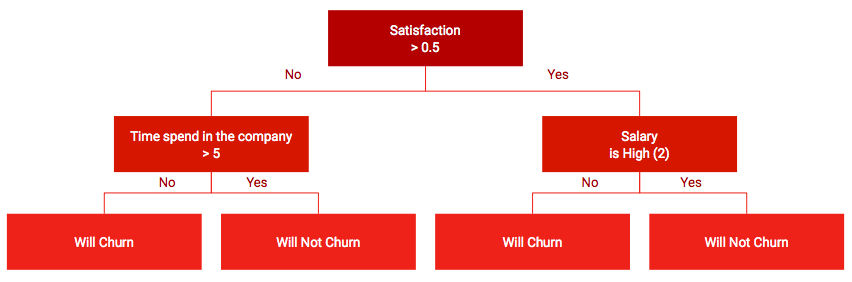

Splitting rules:
The decision tree algorithm aims to achieve partitions in the terminal nodes that are as pure as possible. The Gini index is one of the methods used to calculate purity. It is calculated based on the proportion of samples in each group.

Given the number of people who stayed and left respectively, calculate the Gini index for that node.

- Gini: 2*p*(1-p) <br>

Entropy is also one of measure to calulate purity:
- Entropy: -p*log(p) - (1-p)*log(1-p)

The objective is to minimize the Gini or Entropy to get pure samples at last Node.

let's pick Gini as it will gives us better performance due to faster calculations

Decision Tree splitting: hypothetical example
Total set: 100 observations, 40 left, 60 stayed

Gini: 2*0.4*0.6 = 0.48
Splitting rule: satisfaction > 0.8

Left branch (YES) - 50 people: all stayed
Gini: 2*1*0 = 0
Right branch (NO) - 50 people: 40 left, 10 stayed
Gini: 2*0.4*0.1 = 0.08

In [19]:
#number of people who stayed/left
stayed = 60
left = 1140

#sum of stayed and left
total = stayed + left

#gini index
gini = 2*(stayed/total)*(left/total)
gini

0.095

Splitting the tree:
Given the Gini index that would result from splitting by either variable A or B, respectively, decide by which variable the tree should split next.

#### Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

#### check which Gini is lower and use it for spliting
if gini_A < gini_B:

    print("split by A!")

else:

    print("split by B!")

A train/test split provides the opportunity to develop the classifier on the training component and test it on the rest of the dataset. 

### Fitting the tree to data
In this exercise, you will start developing an employee turnover prediction model using the decision tree classification algorithm. The algorithm provides a .fit() method, which can be used to fit the features to the model in the training set.

Reminder: both target and features are already split into train and test components.

In [20]:
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

#### Checking the accuracy of prediction:
Let's evaluate our accurately our trained model can make predictions! 
We will be using testing set to check the accuracy of your Decision Tree model, with the score() method


In [21]:
# Apply a decision tree model to fit features to the target in the training set
model.fit(X_train, y_train)

# Check the accuracy score of the prediction for the training set
print("Train Accuracy: ", model.score(X_train, y_train)*100)

# Check the accuracy score of the prediction for the test set
print("Test Accuracy: ", model.score(X_test, y_test)*100)

Train Accuracy:  100.0
Test Accuracy:  97.86666666666667


Our algorithm did great work on the training set.
while On the testing set also, it was able to correctly predict if an employee would leave or not in almost 98% of the cases!

Interpretion of Decision Tree:
As we already know the decision tree algorithm works in very similar way as human brain in order to arrive on prediction result.

In this section, we will generate a graphical representation of Our Trained Decision Tree algorithm to understand more about it.

We will perform following 3 steps:
- Export the Algorithm in a file 
- Copying the contents the Exported File using any text editor
- Paste the copied content to generate the Graph on http://www.webgraphviz.com/

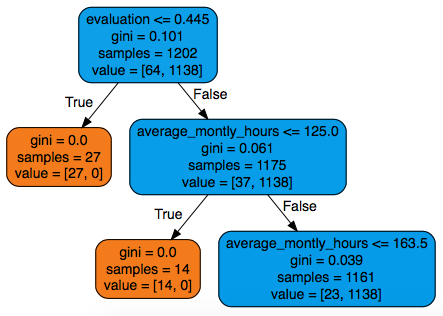

- You can see that, as the Tree is growing Gini Index is Decreasing which was also the purpose of our algorithm

#### Exporting the tree
In Decision Tree classification tasks, overfitting is usually the result of deeply grown trees. As the comparison of accuracy scores on the train and test sets shows, you have overfitting in your results. This can also be learned from the tree visualization.

In this exercise, you will export the decision tree into a text document, which can then be used for visualization.

In [0]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply Decision Tree model to fit Features to the Target
model.fit(X_train,y_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

#### Overfitting
Overfitting is a classic problem in analytics, especially for the decision tree algorithm. Once the tree is fully grown, it may provide highly accurate predictions for the training sample, yet fail to be that accurate on the test set. For that reason, the growth of the decision tree is usually controlled by:

#### Pruning the Tree
- “Pruning” the tree and setting a limit on the maximum depth it can have.
-  "Limiting" the minimum number of observations in one leaf of the tree.

Let's try with limiting the depth First:

In [23]:
# Limiting  Max Depth to 5

model_depth_5 = DecisionTreeClassifier(
                max_depth=5, random_state=42)


# Apply a decision tree model to fit features to the target in the training set
model_depth_5.fit(X_train, y_train)

# Check the accuracy score of the prediction for the training set
print("Train Accuracy: ", model_depth_5.score(X_train, y_train)*100)

# Check the accuracy score of the prediction for the test set
print("Test Accuracy: ", model_depth_5.score(X_test, y_test)*100)

Train Accuracy:  97.51977953595875
Test Accuracy:  97.65333333333334


As we can see our test accuracy increased while Train accuracy decreased resulting in elimination of Overfitting.

Now we will try a model with 100 samples/predicted datapoints at Leaf node:

In [24]:
model_sample_100 = DecisionTreeClassifier(
                   min_samples_leaf=100, random_state=42)


# Apply a decision tree model to fit features to the target in the training set
model_sample_100.fit(X_train, y_train)

# Check the accuracy score of the prediction for the training set
print("Train Accuracy: ", model_sample_100.score(X_train, y_train)*100)

# Check the accuracy score of the prediction for the test set
print("Test Accuracy: ", model_sample_100.score(X_test, y_test)*100)

Train Accuracy:  96.28411414347941
Test Accuracy:  96.50666666666666


Both train and test accuracy Decreased but still they are close to each i.e not underfitted though they can be overfit

Evaluation metrics:
### 1. Confusion Matrix:
- A confusion matrix is a summary of prediction results on a classification problem.

- The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

- The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

- It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

- It is this breakdown that overcomes the limitation of using classification accuracy alone



In [28]:
from sklearn.metrics import confusion_matrix

# Calulating predicted values for train data
y_pred = model.predict(X_test)

# Calculating and displaying the confusion matrix
confusion_matrix(y_test, y_pred)

array([[2842,   48],
       [  32,  828]])

The first row contains employee who did leave organization i.e Negative Class:

- “True negative”:  2842 passengers were correctly classified as not survived.
- 48 were wrongly classified as survived (false Positives).

The second row is about the employees who left organization i.e positive Class: 
- 32 passengers were wrongly classified as Not-survived (False Negtives) 
- 828 were correctly classified as survived and they actually survived (true positives).

- If target is leavers, focus on FN
 - Recall score = TP/(TP+FN)
 - Lower FN, higher Recall score
 - Recall score - % of correct predictions among 1s (leavers)
- If target is stayers, focus on FP
 - Specificity = TN/(TN+FP)
 - Lower FP, higher Specificity,
 - Specificity - % of correct predictions among 0s (stayers)

#### Calculating accuracy metrics: precision
The Precision score is an important metric used to measure the accuracy of a classification algorithm. It is calculated as the **Fraction of True Positives over the sum of True Positives and False Positives**, or

number of True Positives / (number of True Positives + Number of False Positives.)

we define True Positives as the number of employees who actually left, and were classified correctly as leaving
we define False Positives as the number of employees who actually stayed, but were wrongly classified as leaving
If there are no False Positives, the precision score is equal to 1. If there are no True Positives, the recall score is equal to 0.

In [26]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
y_pred = model.predict(X_test)

# Calculate precision score by comparing target_test with the prediction
precision_score(y_test, y_pred)

94.52054794520548

Precision score of 0.945 means 94.5 % of Employees our model predicted as Leaving actually left

#### Calculating accuracy metrics: recall
The Recall score is another important metric used to measure the accuracy of a classification algorithm. It is calculated as the **fraction of True Positives over the sum of True Positives and False Negatives** , or

Number of True Positives / (Number of True Positives + Number of False Negatives)

If there are no False Negatives, the recall score is equal to 1. If there are no True Positives, the recall score is equal to 0.

In this exercise, you will calculate the precision score (using the sklearn function recall_score) for your initial classification model.

In [29]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Use the initial model to predict churn
y_pred = model.predict(X_test)

# Calculate recall score by comparing target_test with the prediction
recall_score(y_test, y_pred)

0.9627906976744186

Recall score of 0.962 means, our model is able to predict 96.2%. of all the Employee who actually left the organization.

AUC score
ROC_AUC

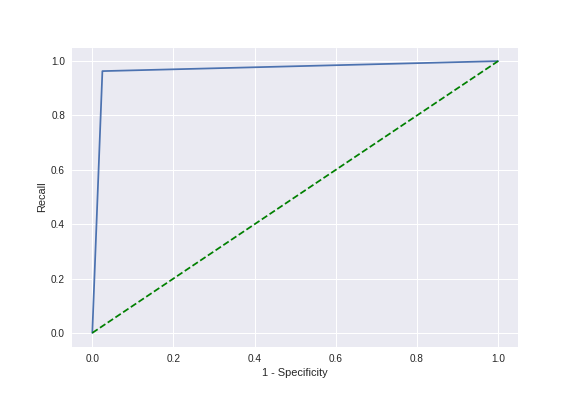

- Vertical axis: Recall
- Horizontal axis: 1 - Specificity(FPR)
- Blue line: ROC
- Green line: baseline
- Area between blue and green: AUC

#### Calculating the ROC/AUC score
While the Recall score is an important metric for measuring the accuracy of a classification algorithm, it puts too much weight on the number of False Negatives. On the other hand, Precision is concentrated on the number of False Positives.

The combination of those two results in the ROC curve allows us to measure both recall and precision. The area under the ROC curve is calculated as the AUC score.

In this exercise, you will calculate the ROC/AUC score for the initial model using the sklearn roc_auc_score() function.

In [30]:
# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
y_pred = model.predict(X_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
recall_score(y_test, y_pred)

0.9627906976744186